# RQ5

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import csv
from collections import Counter

In [3]:
df=pd.DataFrame()

In [4]:
frames=[]
for i in range(1,7):
    M1=pd.read_csv("yellow_tripdata_2018-0"+str(i)+".csv" , encoding = 'latin-1',
               usecols=['tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance'])
    frames.append(M1)
    
df=pd.concat(frames,ignore_index=True)

In [5]:
len(df)

53925735

In [6]:
#For each trip I compute the duration of the trip
format_date='%Y-%m-%d %H:%M:%S'
pickup=pd.to_datetime(df['tpep_pickup_datetime'].str.strip(),format=format_date)
dropoff=pd.to_datetime(df['tpep_dropoff_datetime'].str.strip(), format=format_date)
difference=(dropoff-pickup).astype('timedelta64[m]')
df['Duration']=difference

In [7]:
#clean the giant df
df['Year'] = df['tpep_pickup_datetime'].astype(str).str[0:4]
df=df[df['Year']=='2018']
df=df.drop(['tpep_pickup_datetime','tpep_dropoff_datetime','Year'], axis=1)
df=df[df['trip_distance']>0]
df=df[df['Duration']>0]

In [8]:
len(df)

53391739

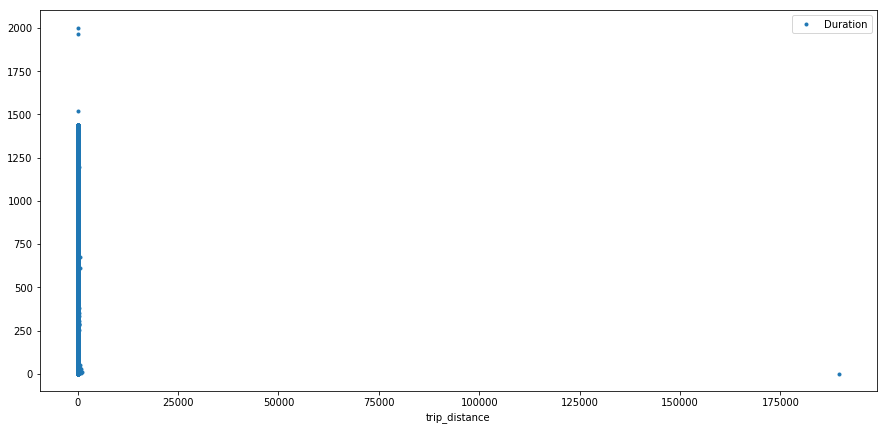

In [9]:
df.plot(x='trip_distance', y='Duration', style='.',figsize=(15,7))

In [10]:
ro=df.corr(method='pearson').iat[0,1]
print(ro)

0.022587538170123118


In [11]:
df=df[df['trip_distance']<2500]
df=df[df['Duration']<1500]

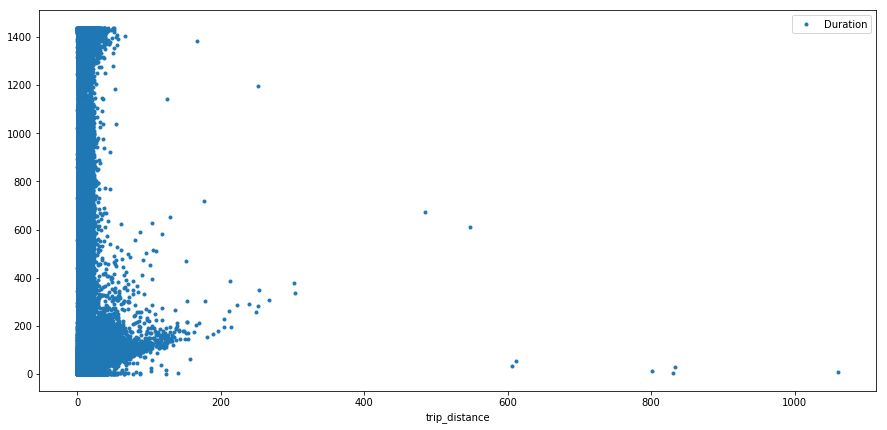

In [12]:
df.plot(x='trip_distance', y='Duration', style='.',figsize=(15,7))